In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%autoreload 2import datetime
from helpers import *


ERROR:root:Line magic function `%autoreload` not found.


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    #w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(tx),tx)),np.transpose(tx)),y)
    w = np.linalg.solve(np.dot(np.transpose(tx),tx),np.dot(np.transpose(tx),y))
    error = y - np.dot(tx,w)
    return w,error

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    print(least_squares(y,tx))

Test it here

In [5]:
test_your_least_squares()

(array([ 73.293922  ,  13.47971243]), array([ 10.3203658 ,  -8.06398145,  -3.83673268, ...,  -6.20852099,
        -8.248026  ,  -6.19949197]))


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
#(50,) -> ligne
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [7]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    toReturn = []
    for j in range(0,degree+1):
        toReturn = np.append(toReturn,np.power(x,j))
        
       
    return np.transpose(np.reshape(toReturn,(degree+1,len(x))))
        
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************

In [8]:
build_poly([1,2,3,8],3)

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    8.,   64.,  512.]])

In [9]:
def compute_mse(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    n = len(y)
    e = y - np.dot(tx,w)
    return np.dot(np.transpose(e),e)/(2*n)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [10]:
from plots import *
x_prime= np.transpose([np.ones(len(x)), x])
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tmp = build_poly(x,degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        l_s = least_squares(y,tmp)
        weights = l_s[0]
        rmse = compute_mse(y,tmp,weights)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.11133351726547978
Processing 2th experiment, degree=3, rmse=0.03343252619709056
Processing 3th experiment, degree=7, rmse=0.031164734143881566
Processing 4th experiment, degree=12, rmse=0.02959318128147586


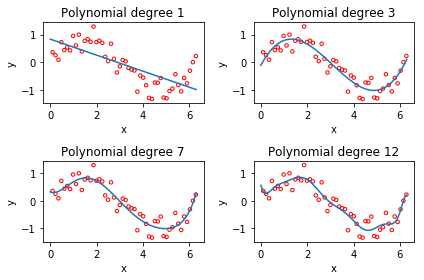

In [11]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [12]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    new = np.transpose([x,y])
    np.random.seed(seed)
    np.random.shuffle(new)
    x_new = np.transpose(new)[0]
    y_new = np.transpose(new)[1]
    lenght = len(x)
    lenght_table = lenght - 1
    index = int(np.round(ratio * len(x)))
    y_training = y_new[0:index]
    x_training = x_new[0:index]
    y_test = y_new[index:lenght_table]
    x_test=x_new[index:lenght_table]
    return x_training,y_training,x_test,y_test
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    raise NotImplementedError

Then, test your `split_data` function below.

In [13]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_training,y_training,x_test,y_test = split_data(x,y,ratio,seed)
    # ***************************************************
    x_training_poly = build_poly(x_training,degree)
    x_test_poly = build_poly(x_test,degree)
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    l_s_training = least_squares(y_training,x_training_poly)
    weights_training = l_s_training[0]
    l_s_test = least_squares(y_test,x_test_poly)
    weights_test = l_s_test[0]
    rmse_tr = np.sqrt(2*compute_mse(y_training,x_training_poly,weights_training))
    rmse_te = np.sqrt(2*compute_mse(y_test,x_test_poly,weights_training))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [14]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.165
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.216
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.245
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.265
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.536
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.299
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.289
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.576
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.540
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.457
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.266
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=4.689


# 3 Ridge Regression
Please fill in the function below.

In [15]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    return np.linalg.solve(np.dot(np.transpose(tx),tx)+((2*len(y)*lambda_)*np.identity(tx.shape[1])),np.dot(np.transpose(tx),y))
    #return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(tx),tx)+(2*len(y)*lambda_)*np.identity(tx.shape[1])),np.transpose(tx)),y)

In [16]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_training,y_training,x_test,y_test = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_training_poly = build_poly(x_training,degree)
    x_test_poly = build_poly(x_test,degree)
    rmse_tr= []
    rmse_te= []

    for ind, lambda_ in enumerate(lambdas):
        weights_training = ridge_regression(y_training,x_training_poly,lambda_)
        weights_test = ridge_regression(y_test,x_test_poly,lambda_)
        rmse_tr = np.append(rmse_tr,np.sqrt(2*compute_mse(y_training,x_training_poly,weights_training)))
        rmse_te = np.append(rmse_te,np.sqrt(2*compute_mse(y_test,x_test_poly,weights_training)))
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.344
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.344
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.343
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.342
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.341
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.340
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.325
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.307
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.284
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.272
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.287
proportion=0.5, degree=7, lambda=0.193, 

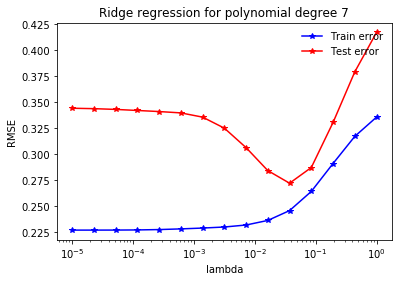

In [17]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)